# Runtime & Rating - Is there a connect? - Section 1 - Importing data
# I am going to be using a Rotten Tomatoes Dataset for this test, we will be looking for correlation between Runtime, Audience Count and Audience Rating.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# This is a [link](https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset) directly to the dataset used for this test.

In [ ]:
# In this cell I have mounted the data set and provided 1 example of the format the dataset is currently in.
Movies = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/rotten_tomatoes_movies.csv', index_col=0)
Movies.head(1)

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
rotten_tomatoes_link,,,,,,,,,,,,,,,,,,,,,
m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [ ]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17712 entries, m/0814255 to m/zulu_dawn
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       17712 non-null  object 
 1   movie_info                        17391 non-null  object 
 2   critics_consensus                 9134 non-null   object 
 3   content_rating                    17712 non-null  object 
 4   genres                            17693 non-null  object 
 5   directors                         17518 non-null  object 
 6   authors                           16170 non-null  object 
 7   actors                            17360 non-null  object 
 8   original_release_date             16546 non-null  object 
 9   streaming_release_date            17328 non-null  object 
 10  runtime                           17398 non-null  float64
 11  production_company                17213 non-null  object 


In [ ]:
Movies['audience_rating'] = pd.to_numeric(Movies['audience_rating'])

# Section 2 - Filtering our lists.
# In this section I will filter out anything unescessary for the test.

In [ ]:
# Here I created a new filter titled Movies2 which selects only the columns we are using for this test
Movies2 = Movies[['movie_title','genres','audience_rating','runtime']]

In [ ]:
# I then created another filter Movies3 which only applies 1 genre which is horror.
Movies3_filtered = Movies2[Movies2['genres'].isin(['Horror'])]

In [ ]:
# I then wanted to see the info to my new filter.
Movies3_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, m/10004684-malevolence to m/zombi_2_1979
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_title      456 non-null    object 
 1   genres           456 non-null    object 
 2   audience_rating  446 non-null    float64
 3   runtime          446 non-null    float64
dtypes: float64(2), object(2)
memory usage: 17.8+ KB


In [ ]:
# Here I further sort our movies into a specific dynamic we want to look at.
Movies3_filtered_rating = Movies3_filtered.loc[(Movies3_filtered['audience_rating'] >= 60) & (Movies3_filtered['runtime'] <= 180)]

In [ ]:
# I then showed how many rows are in the section.
Movies3_filtered.shape

(456, 4)

In [ ]:
# Here I did a null check to see our null values.
Movies3_filtered.isnull().sum()

movie_title         0
genres              0
audience_rating    10
runtime            10
dtype: int64

In [ ]:
# After seeing my null values in this section I remove them from my rows.
Movies3_filtered.dropna(inplace=True)
Movies3_filtered.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(442, 4)

# Section 3 - Listing, Sorting and Visualizing - Horror Movies

---



My hypothesis is that shorter horror movies are more popular. This can be tested by taking in a number of movies the horror genre. I will filter my movies from ratings above 60 and any runtime below 180 minutesand run a pearsonr test to see if there is a correlation between Runtime and Audience Rating. This is valuable to producers so they can see what is the optimal length for their movie and plan accordingly.

In [ ]:
# In the first cell I want to see what my new dataset looks like.
Movies3_filtered.head()

,movie_title,genres,audience_rating,runtime
rotten_tomatoes_link,,,,
m/10004684-malevolence,Malevolence,Horror,83.0,90.0
m/1001138-april_fools_day,April Fool's Day,Horror,47.0,89.0
m/1003625-carrie,Carrie,Horror,77.0,98.0
m/1005360-day_of_the_dead,Day of the Dead,Horror,75.0,102.0
m/1006068-dolls,Dolls,Horror,51.0,77.0


In [ ]:
# I then take it a step farther and sort by runtime so we can easily see the top runtime vs low runtime.
Movies3_filtered.sort_values('runtime').iloc[0:5]

,movie_title,genres,audience_rating,runtime
rotten_tomatoes_link,,,,
m/rammbock_berlin_undead,Rammbock: Berlin Undead,Horror,59.0,59.0
m/mummys_ghost,The Mummy's Ghost,Horror,20.0,60.0
m/manborg,Manborg,Horror,57.0,70.0
m/aquaslash,Aquaslash,Horror,27.0,71.0
m/slumber_party_massacre,The Slumber Party Massacre,Horror,44.0,73.0


In [ ]:
# I then run my pearsonr test to see the correlation between runtime and audience rating. 
stats.pearsonr(Movies3_filtered_rating['runtime'],Movies3_filtered_rating['audience_rating'])

(0.063921519096992, 0.5963934329330153)

# As we can see from the pearsonr test there is little to no correlation to support my hypothesis.

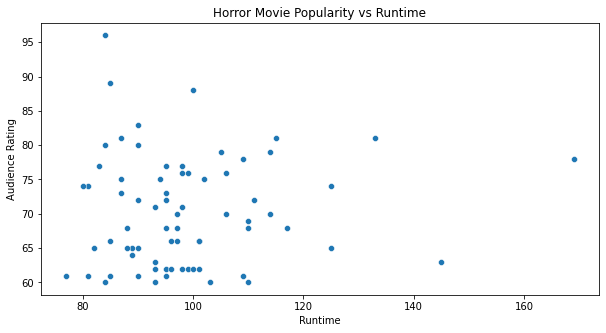

In [ ]:
# After running our personr test it is timme to show a scatterpoint graph to visualize our data. 
# As you can see from our graph there is little to no correlation. 
plt.figure(figsize=(10,5))
sns.scatterplot(x="runtime", y="audience_rating", data=Movies3_filtered_rating)
plt.xlabel("Runtime")
plt.ylabel("Audience Rating")
plt.title('Horror Movie Popularity vs Runtime')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3fe1d1290>]],
      dtype=object)

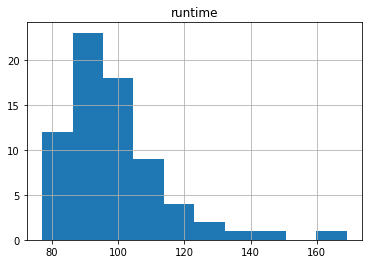

In [ ]:
# After running our personr test it is timme to show a boxplot graph to visualize our data. 
Movies3_filtered_rating.hist(column ='runtime')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4147d7310>]],
      dtype=object)

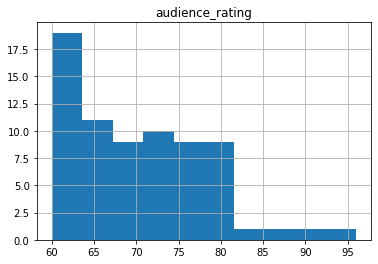

In [ ]:
# After running our personr test it is timme to show a boxplot graph to visualize our data. 
Movies3_filtered_rating.hist(column ='audience_rating')

In [ ]:
# Here I created a new filter titled Movies2 which selects only the columns we are using for this test
Movies5 = Movies[['movie_title','genres','audience_rating','runtime','audience_count']]

In [ ]:
# I then created another filter Movies3 which only applies 1 genre which is horror.
Movies5_filtered = Movies5[Movies5['genres'].isin(['Horror'])]

In [ ]:
# Here I further sort our movies into a specific dynamic we want to look at.
Movies5_filtered_rating = Movies5_filtered.loc[(Movies5_filtered['audience_count'] <= 150000) & (Movies5_filtered['audience_count'] > 20000)]

In [ ]:
Movies5_filtered.dropna(inplace=True)
Movies5_filtered.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(442, 5)

In [ ]:
# I then run my pearsonr test to see the correlation between audience rating and audience count.
stats.pearsonr(Movies5_filtered_rating['audience_rating'],Movies5_filtered_rating['audience_count'])

(0.20888534028789066, 0.0740883800435584)

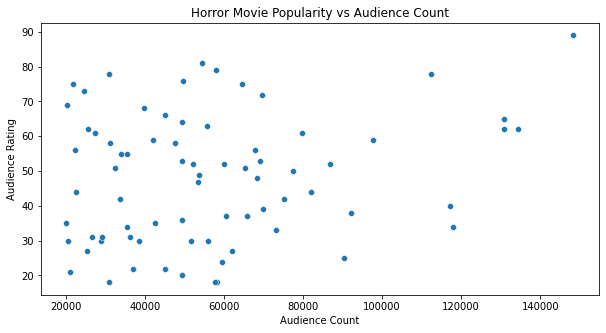

In [ ]:
# After running our personr test it is timme to show a scatterpoint graph to visualize our data. 
# As you can see from our graph there is a little to no correlation. 
plt.figure(figsize=(10,5))
sns.scatterplot(x="audience_count", y="audience_rating", data=Movies5_filtered_rating)
plt.xlabel("Audience Count")
plt.ylabel("Audience Rating")
plt.title('Horror Movie Popularity vs Audience Count')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3fdd81190>]],
      dtype=object)

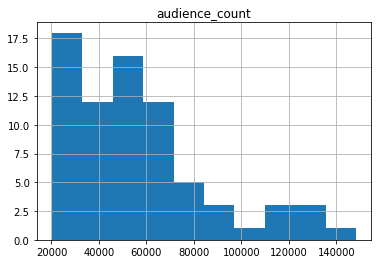

In [ ]:
Movies5_filtered_rating.hist(column ='audience_count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3fdc5b910>]],
      dtype=object)

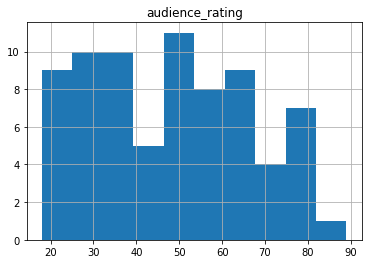

In [ ]:
Movies5_filtered_rating.hist(column ='audience_rating')

# Section 4 - Listing, Sorting and Visualizing - Action Movies

My hypothesis is that longer action movies are more popular. This can be tested by taking in a number of movies the horror genre. I will filter my movies from ratings above 60 and any runtime below 180 minutesand run a pearsonr test to see if there is a correlation between Runtime and Audience Rating. This is valuable to producers so they can see what is the optimal length for their movie and plan accordingly.

In [ ]:
# I created another filter Movies4 which only applies 1 genre which is action & adventure.
Movies4_filtered = Movies2[Movies2['genres'].isin(['Action & Adventure'])]

In [ ]:
# I then wanted to see the info to my new filter.
Movies4_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, m/10010153-bitch_slap to m/xxx_state_of_the_union
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_title      204 non-null    object 
 1   genres           204 non-null    object 
 2   audience_rating  204 non-null    float64
 3   runtime          202 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.0+ KB


In [ ]:
# Here I further sort our movies into a specific dynamic we want to look at.
Movies4_filtered_rating = Movies4_filtered.loc[(Movies4_filtered['audience_rating'] >= 60) & (Movies4_filtered['runtime'] <= 180)]

In [ ]:
# I then showed how many rows are in the section.
Movies4_filtered.shape

(204, 4)

In [ ]:
# Here I did a null check to see our null values.
Movies4_filtered.isnull().sum()

movie_title        0
genres             0
audience_rating    0
runtime            2
dtype: int64

In [ ]:
# After seeing my null values in this section I remove them from my rows.
Movies4_filtered.dropna(inplace=True)
Movies4_filtered.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(202, 4)

In [ ]:
# In the first cell I want to see what my new dataset looks like.
Movies4_filtered.head()

,movie_title,genres,audience_rating,runtime
rotten_tomatoes_link,,,,
m/10010153-bitch_slap,Bitch Slap,Action & Adventure,29.0,104.0
m/1003060-breakout,Breakout,Action & Adventure,41.0,96.0
m/1004567-commando,Commando,Action & Adventure,67.0,90.0
m/1014008-missing_in_action,Missing in Action,Action & Adventure,42.0,102.0
m/1015095-nighthawks,Nighthawks,Action & Adventure,54.0,99.0


In [ ]:
# I then take it a step farther and sort by runtime so we can easily see the top runtime vs low runtime.
Movies4_filtered.sort_values('runtime').iloc[0:60]

,movie_title,genres,audience_rating,runtime
rotten_tomatoes_link,,,,
m/justice_league_gods_and_monsters,Justice League: Gods and Monsters,Action & Adventure,71.0,72.0
m/bring_me_the_head_of_the_machine_gun_woman,Bring Me the Head of the Machine Gun Woman (Tr...,Action & Adventure,43.0,75.0
m/antboy,Antboy,Action & Adventure,36.0,77.0
m/intensive_care,Intensive Care,Action & Adventure,14.0,80.0
m/1129132-torque,Torque,Action & Adventure,41.0,81.0
m/blind_fury,Blind Fury,Action & Adventure,51.0,82.0
m/arme_riddere,Jackpot,Action & Adventure,55.0,82.0
m/passenger_57,Passenger 57,Action & Adventure,38.0,83.0
m/the_last_heist,The Last Heist,Action & Adventure,12.0,84.0


In [ ]:
# I then run my pearsonr test to see the correlation between runtime and audience rating. 
stats.pearsonr(Movies4_filtered['runtime'],Movies4_filtered['audience_rating'])

(0.3949216402755179, 6.019562883900148e-09)

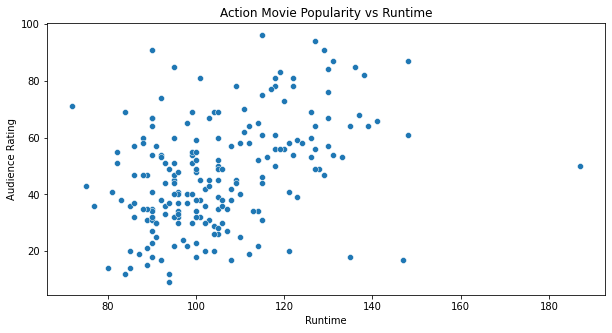

In [ ]:
# After running our personr test it is timme to show a scatterpoint graph to visualize our data. 
# As you can see from our graph there is little to no correlation.
plt.figure(figsize=(10,5))
sns.scatterplot(x="runtime", y="audience_rating", data=Movies4_filtered)
plt.xlabel("Runtime")
plt.ylabel("Audience Rating")
plt.title('Action Movie Popularity vs Runtime',)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3fdff4a90>]],
      dtype=object)

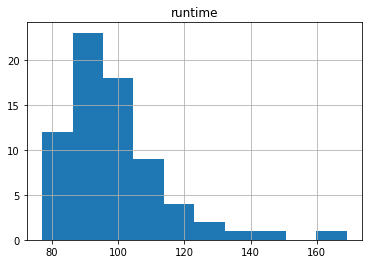

In [ ]:
# After running our personr test it is timme to show a boxplot graph to visualize our data. 
Movies3_filtered_rating.hist(column ='runtime')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3fdf7fc50>]],
      dtype=object)

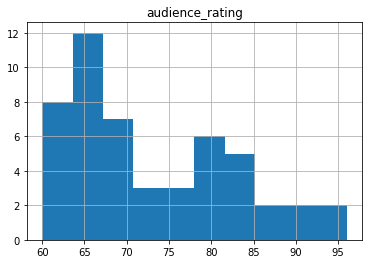

In [ ]:
# After running our personr test it is timme to show a boxplot graph to visualize our data. 
Movies4_filtered_rating.hist(column ='audience_rating')

In [ ]:
# Here I created a new filter titled Movies2 which selects only the columns we are using for this test
Movies6 = Movies[['movie_title','genres','audience_rating','runtime','audience_count']]

In [ ]:
# I then created another filter Movies3 which only applies 1 genre which is Action & Adventure.
Movies6_filtered = Movies6[Movies5['genres'].isin(['Action & Adventure'])]

In [ ]:
# Here I further sort our movies into a specific dynamic we want to look at.
Movies6_filtered_rating = Movies6_filtered.loc[(Movies6_filtered['audience_count'] <= 150000) & (Movies6_filtered['audience_count'] > 20000)]

In [ ]:
Movies6_filtered.dropna(inplace=True)
Movies6_filtered.shape

In [ ]:
# I then run my pearsonr test to see the correlation between audience rating and audience count.
stats.pearsonr(Movies6_filtered_rating['audience_rating'],Movies6_filtered_rating['audience_count'])

(0.19787383789602958, 0.1263560515912538)

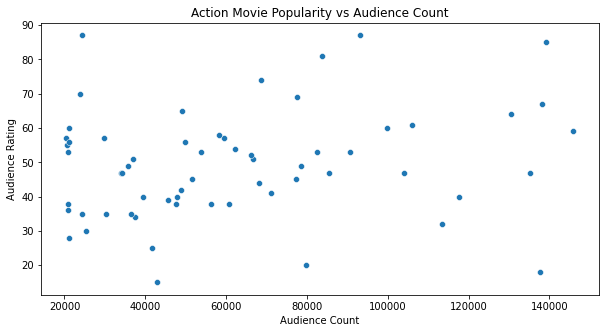

In [ ]:
# After running our personr test it is timme to show a scatterpoint graph to visualize our data. 
# As you can see from our graph there is a little correlation to no correlation. 
plt.figure(figsize=(10,5))
sns.scatterplot(x="audience_count", y="audience_rating", data=Movies6_filtered_rating)
plt.xlabel("Audience Count")
plt.ylabel("Audience Rating")
plt.title('Action Movie Popularity vs Audience Count')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3fd9bfcd0>]],
      dtype=object)

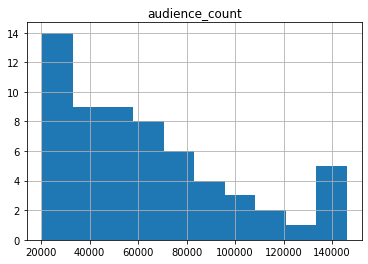

In [ ]:
Movies6_filtered_rating.hist(column ='audience_count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3fdc04190>]],
      dtype=object)

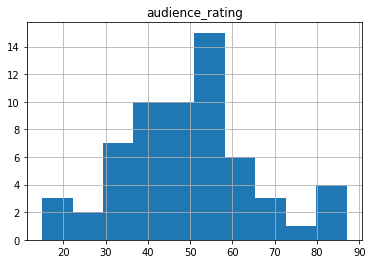

In [ ]:
Movies6_filtered_rating.hist(column ='audience_rating')

# Section 6 - Conclusion

In conclusion after assessing all the data provided we can show that there is little to no correlation between short or long movies in either Action or Horror. What this means for producers is that regardless whether they decide to make a short film or a long film it has little to know bearing on how the audience will rate the film.